<a href="https://colab.research.google.com/github/Prasanna-k-Nalabolu/NLP/blob/main/Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Download necessary NLTK data (if you haven't already)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')  # Needed for lemmatizer with 'wordnet'
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

# Load the data
df = pd.read_csv("/content/WASSA23_essay_level_with_labels_train (2).tsv", sep='\t')

df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern,speaker_number,split,essay_id,emotion
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,6.5,6.0,4.857,2.0,3.429,5.0,1,train,1,Hope/Sadness
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,5.5,4.5,3.429,2.857,2.857,2.714,1,train,2,Anger
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,6.75,7.0,4.643,2.0715,4.143,4.643,1,train,4,Sadness
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,4.5,3.5,5.0,4.143,4.857,5.0,1,train,5,Sadness
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,6.5,6.0,4.857,2.0,3.429,5.0,1,train,7,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,495,218,I feel that this will become a national proble...,6.500000,6.750,30,1,6,3,37,...,6.5,6.0,4.857,2.0,3.429,5.0,2,train,994,Neutral
788,496,103,The whole situation is sketchy. The wavering r...,3.166667,6.375,16,2,5,1,28,...,4.5,3.5,5.0,4.143,4.857,5.0,2,train,995,Neutral
789,498,103,The death of a former aide to Russian Presiden...,6.000000,2.000,43,2,6,1,33,...,7.0,7.0,4.286,1.286,3.857,4.0,2,train,997,Neutral
790,499,103,Everything about Russia really freaks me out. ...,6.000000,6.000,53,2,3,1,27,...,6.0,6.0,4.0,2.286,3.571,3.714,2,train,998,Fear


In [ ]:
df['essay'].unique()

array(['It breaks my heart to see people living in those conditions. I hope that all the aid that was sent to the island makes it to the people who need it the most. I do not know what I would do it that was my family and I. I would hope that I would do my best, but I can see how depressing and hopeless you could feel having your whole life changed because of a storm and not knowing where your next meal is coming from.',
       "I wonder why there aren't more people trying to help these people. I understand Haiti is not the richest nor less corrupt country but surely there must be a way to help. Supplies being looted by crowds is understandable because they are hungry and people need food and water to survive. We must think of other ways to distribute the food and water.",
       "After reading the article, you can't help but feel really sad and terrible for the people that were affected by the hurricane. It was a situation that they did not deserve and one that they most likely did no

In [ ]:
df['emotion'].unique()

array(['Hope/Sadness', 'Anger', 'Sadness', 'Neutral', 'Disgust/Sadness',
       'Anger/Disgust', 'Fear/Sadness', 'Joy', 'Hope', 'Joy/Neutral',
       'Disgust', 'Neutral/Sadness', 'Neutral/Surprise', 'Anger/Neutral',
       'Hope/Neutral', 'Surprise', 'Anger/Sadness', 'Fear', 'Anger/Joy',
       'Disgust/Fear', 'Fear/Neutral', 'Fear/Hope', 'Joy/Sadness',
       'Anger/Disgust/Sadness', 'Anger/Surprise', 'Disgust/Neutral',
       'Anger/Fear', 'Sadness/Surprise', 'Disgust/Surprise', 'Anger/Hope'],
      dtype=object)

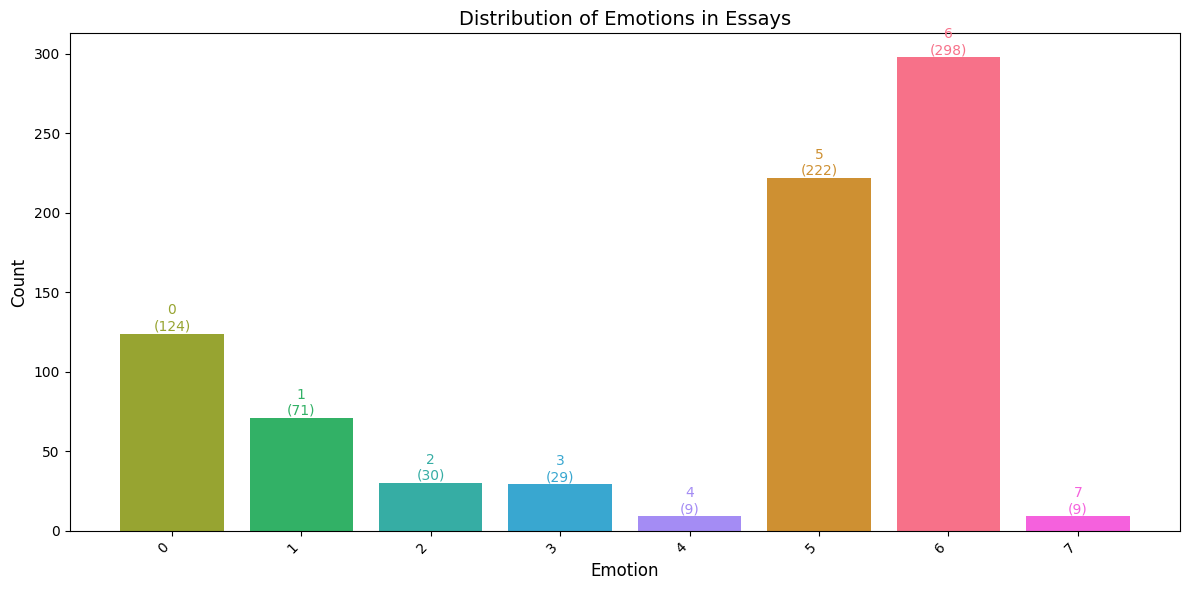

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each emotion
emotion_counts = df['emotion'].value_counts()

# Create a color palette for the emotions
emotion_colors = sns.color_palette("husl", len(emotion_counts))

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(emotion_counts.index, emotion_counts.values, color=emotion_colors)

# Add labels and title
plt.xlabel("Emotion", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Emotions in Essays", fontsize=14)

# Add text labels to the bars with color-coding
for bar, emotion, color in zip(bars, emotion_counts.index, emotion_colors):
  plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{emotion}\n({bar.get_height()})", ha='center', va='bottom', color=color, fontsize=10)


plt.xticks(rotation=45, ha="right") # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# Drop rows with missing 'essay' values
df = df.dropna(subset=['essay'])

# Keep only the 'essay' and 'emotion' columns
df = df[['essay', 'emotion']]

print(df.head())

                                               essay       emotion
0  It breaks my heart to see people living in tho...  Hope/Sadness
1  I wonder why there aren't more people trying t...         Anger
2  After reading the article, you can't help but ...       Sadness
3  It is so sad that someone who had such an amaz...       Sadness
4  From reading the article, it looks like the wo...       Neutral


In [ ]:
# Text Cleaning
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['essay'] = df['essay'].apply(clean_text)
print(df['essay'].head())

0    It breaks my heart to see people living in tho...
1    I wonder why there arent more people trying to...
2    After reading the article you cant help but fe...
3    It is so sad that someone who had such an amaz...
4    From reading the article it looks like the wor...
Name: essay, dtype: object


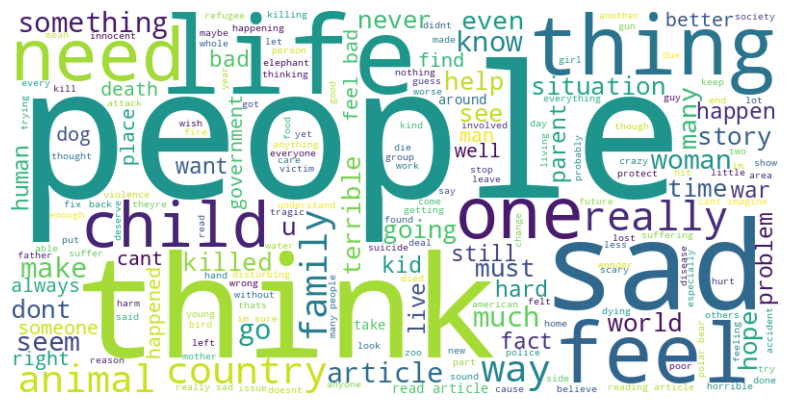

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' and 'essay' column are defined from the previous code
text = " ".join(review for review in df['essay'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Handling Multi-label Emotions
from sklearn.preprocessing import MultiLabelBinarizer

# Split combined emotion labels
df['emotion'] = df['emotion'].str.split('/')

# Use MultiLabelBinarizer to convert to binary matrix
mlb = MultiLabelBinarizer()
emotion_labels = mlb.fit_transform(df['emotion'])
emotion_df = pd.DataFrame(emotion_labels, columns=mlb.classes_)

# Concatenate the binary emotion columns to the original dataframe
df = pd.concat([df, emotion_df], axis=1)

# Drop the original 'emotion' column
df = df.drop('emotion', axis=1)

print(df.head())

                                               essay  Anger  Disgust  Fear  \
0  break heart see people living condition hope a...      0        0     0   
1  wonder arent people trying help people underst...      1        0     0   
2  reading article cant help feel really sad terr...      0        0     0   
3  sad someone amazing story died freak accident ...      0        0     0   
4  reading article look like world lost kindheart...      0        0     0   

   Hope  Joy  Neutral  Sadness  Surprise  
0     1    0        0        1         0  
1     0    0        0        0         0  
2     0    0        0        1         0  
3     0    0        0        1         0  
4     0    0        1        0         0  


In [ ]:
# Option 3: Choose a Primary Label (Handling Multi-label Emotions)
# Assuming you want to create a new 'emotion' column with the first emotion from the original labels
# First, recreate the original 'emotion' column by joining the one-hot encoded columns
df['emotion'] = df.apply(lambda row: '/'.join([col for col in mlb.classes_ if row[col] == 1]), axis=1)

# Now, apply the lambda function to extract the primary emotion
df['emotion'] = df['emotion'].apply(lambda x: x.split('/')[0] if isinstance(x, str) else x)

In [ ]:
# TF-IDF (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(df['essay'])

# Feature Scaling (Important for some models) - FIX: with_mean=False
scaler = StandardScaler(with_mean=False) #  This line is changed

tfidf_scaled = scaler.fit_transform(tfidf_features)

print(tfidf_df.head())

   abalone  abandon  abandoned  abducted  abel  abide  ability  able  \
0      0.0      0.0        0.0       0.0   0.0    0.0      0.0   0.0   
1      0.0      0.0        0.0       0.0   0.0    0.0      0.0   0.0   
2      0.0      0.0        0.0       0.0   0.0    0.0      0.0   0.0   
3      0.0      0.0        0.0       0.0   0.0    0.0      0.0   0.0   
4      0.0      0.0        0.0       0.0   0.0    0.0      0.0   0.0   

   abolished  abroad  ...  youngest  youre  youth   yu  zealand  zealous  \
0        0.0     0.0  ...       0.0    0.0    0.0  0.0      0.0      0.0   
1        0.0     0.0  ...       0.0    0.0    0.0  0.0      0.0      0.0   
2        0.0     0.0  ...       0.0    0.0    0.0  0.0      0.0      0.0   
3        0.0     0.0  ...       0.0    0.0    0.0  0.0      0.0      0.0   
4        0.0     0.0  ...       0.0    0.0    0.0  0.0      0.0      0.0   

   zone  zoo  zulyatu  zzos  
0   0.0  0.0      0.0   0.0  
1   0.0  0.0      0.0   0.0  
2   0.0  0.0      0.

In [ ]:
# Word Embeddings (using pre-trained models like Word2Vec, GloVe, or FastText)
import gensim.downloader as api
from gensim.models import Word2Vec
import numpy as np

# Download pre-trained GloVe embeddings (smaller version for demonstration)
glove_model = api.load("glove-twitter-25") # Or try "glove-wiki-gigaword-100" for larger, but requires more memory

def get_embedding(text):
    words = text.split()
    embeddings = [glove_model[word] for word in words if word in glove_model.key_to_index]  # Only embed known words

    if embeddings:
        return np.mean(embeddings, axis=0)  # Average word embeddings
    else:
        return np.zeros(glove_model.vector_size)  # Return zero vector if no words are found

df['embedding'] = df['essay'].apply(get_embedding)

# 'embedding' column now contains a vector for each essay.  You can't directly print the whole column.
print(df['embedding'].head())

0    [-0.29873714, 0.40271896, -0.035586387, -0.078...
1    [-0.032585923, 0.4577798, -0.43675643, -0.1786...
2    [-0.13119762, 0.25695306, -0.2527061, 0.004057...
3    [-0.22421074, 0.10243239, 0.13546236, -0.02632...
4    [-0.119459175, 0.07802258, -0.059857164, -0.07...
Name: embedding, dtype: object


In [ ]:
# BERT Embeddings (or other Transformer-based embeddings):
from transformers import BertTokenizer, BertModel
import torch

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embedding(text):
    # Tokenize the text
    input_ids = tokenizer.encode(text, add_special_tokens=True, max_length=128, truncation=True)  # Limit length

    # Pad the input sequence
    input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension

    # Get the BERT embeddings
    with torch.no_grad():
        outputs = model(input_ids)
        embeddings = outputs.last_hidden_state.mean(dim=1).squeeze()  # Mean pooling

    return embeddings.numpy()

df['bert_embedding'] = df['essay'].apply(get_bert_embedding)
print(df['bert_embedding'].head())

0    [0.12229391, -0.1052664, 0.65718186, -0.282578...
1    [0.32483, 0.21744594, 0.6080993, 0.08136805, 0...
2    [0.13566281, 0.06189111, 0.54691446, -0.272877...
3    [0.19298097, 0.021918043, 0.5157263, -0.014282...
4    [0.23997803, 0.13786948, 0.44961143, -0.023399...
Name: bert_embedding, dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import issparse

scaler = StandardScaler(with_mean=False)

# Assuming you have a TF-IDF matrix called 'tfidf_features'
# Check if tfidf_features is sparse
if issparse(tfidf_features):
    tfidf_scaled = scaler.fit_transform(tfidf_features)
else:
    tfidf_scaled = scaler.fit_transform(tfidf_features)

# If using embeddings, scale the embedding column:
# First, stack the embeddings into a 2D array
embeddings_matrix = np.vstack(df['embedding'].to_numpy()) # or df['bert_embedding']

# Now scale
embeddings_scaled = scaler.fit_transform(embeddings_matrix)

In [ ]:
# Final Data Preparation
from sklearn.model_selection import train_test_split

# Example using TF-IDF and Option 3 for emotion handling (single label)
X = tfidf_scaled  # Use the scaled TF-IDF features
y = df['emotion']  # The emotion labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 60% train, 20% val, 20% test (splitting training data to create validation data)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 474
Validation set size: 159
Test set size: 159


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import issparse
import gensim.downloader as api
from gensim.models import Word2Vec
import numpy as np
from transformers import BertTokenizer, BertModel
import torch

# 1. Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))


Logistic Regression Accuracy: 0.4716981132075472
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.14      0.21        28
           1       0.50      0.08      0.14        12
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1
           5       0.41      0.38      0.39        39
           6       0.51      0.83      0.63        66
           7       0.00      0.00      0.00         2

    accuracy                           0.47       159
   macro avg       0.22      0.18      0.17       159
weighted avg       0.41      0.47      0.41       159



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 2. Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.5345911949685535
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1
           5       0.44      0.69      0.54        39
           6       0.60      0.88      0.71        66
           7       0.00      0.00      0.00         2

    accuracy                           0.53       159
   macro avg       0.13      0.20      0.16       159
weighted avg       0.36      0.53      0.43       159



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 3. Gradient Boosting Machine (GBM)
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_predictions))

Gradient Boosting Accuracy: 0.5534591194968553
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.29      0.37        28
           1       1.00      0.08      0.15        12
           2       0.75      0.50      0.60         6
           3       0.50      0.20      0.29         5
           4       0.00      0.00      0.00         1
           5       0.41      0.77      0.54        39
           6       0.70      0.68      0.69        66
           7       0.00      0.00      0.00         2

    accuracy                           0.55       159
   macro avg       0.49      0.32      0.33       159
weighted avg       0.61      0.55      0.53       159



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


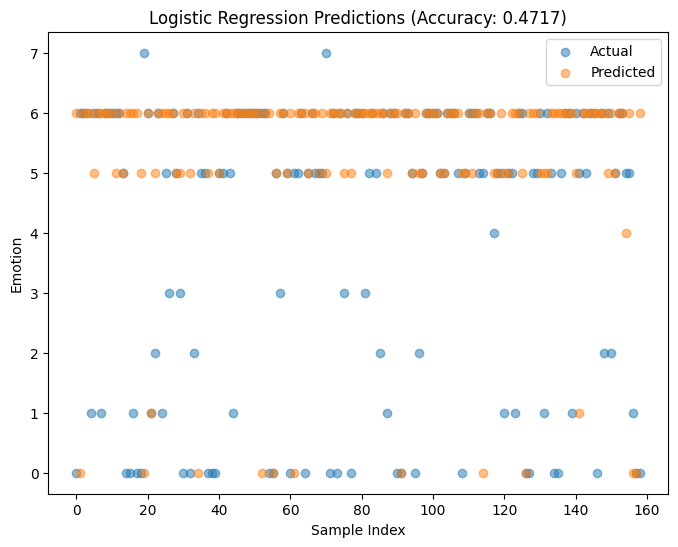

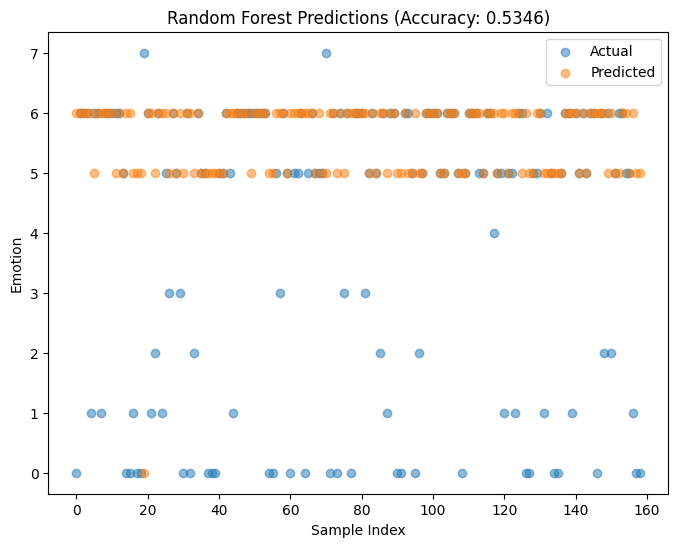

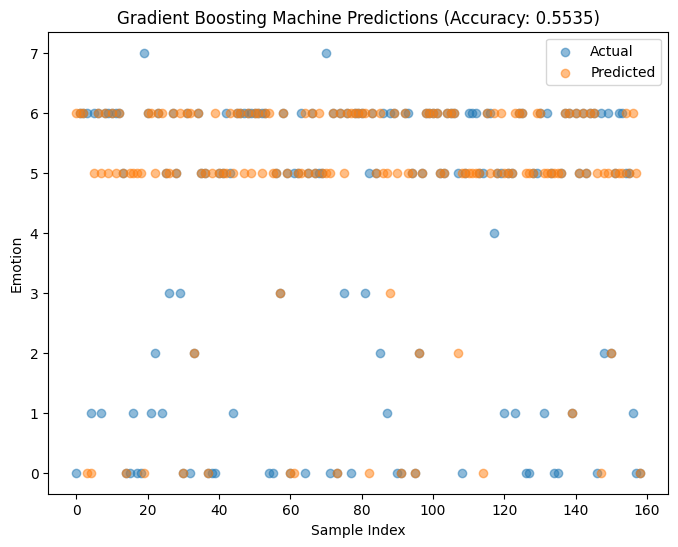


The best performing model is: Gradient Boosting Machine with an accuracy of 0.5535


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming you have already trained the models (lr_classifier, rf_classifier, gb_classifier)
# and have the test data (X_test, y_test) as in the provided code.

# Function to create scatter plot for a given model
def plot_scatter(model, model_name):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(y_test)), y_test, label='Actual', alpha=0.5)  # Actual values
    plt.scatter(range(len(predictions)), predictions, label='Predicted', alpha=0.5)  # Predicted values

    plt.title(f'{model_name} Predictions (Accuracy: {accuracy:.4f})')
    plt.xlabel('Sample Index')
    plt.ylabel('Emotion')
    plt.legend()
    plt.show()


# Create scatter plots for each model
plot_scatter(lr_classifier, 'Logistic Regression')
plot_scatter(rf_classifier, 'Random Forest')
plot_scatter(gb_classifier, 'Gradient Boosting Machine')

# Determine the best model based on accuracy
accuracies = {
    'Logistic Regression': accuracy_score(y_test, lr_predictions),
    'Random Forest': accuracy_score(y_test, rf_predictions),
    'Gradient Boosting Machine': accuracy_score(y_test, gb_predictions)
}

best_model = max(accuracies, key=accuracies.get)
print(f"\nThe best performing model is: {best_model} with an accuracy of {accuracies[best_model]:.4f}")


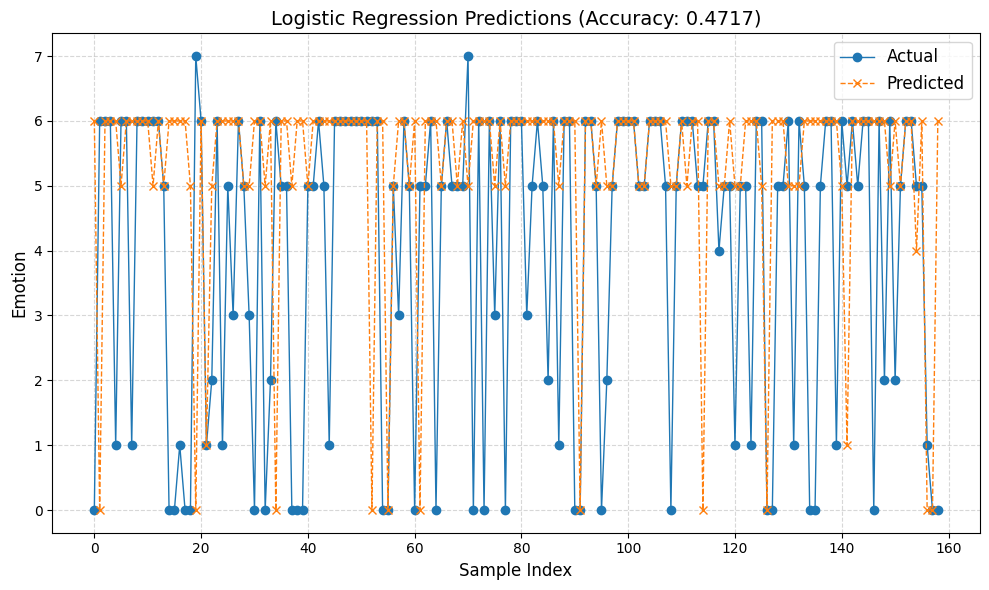

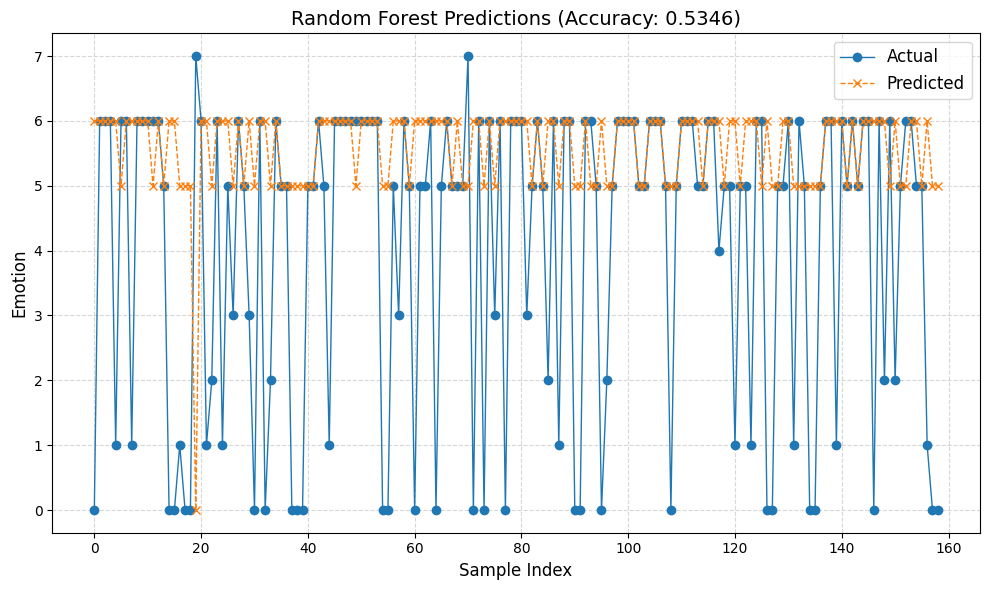

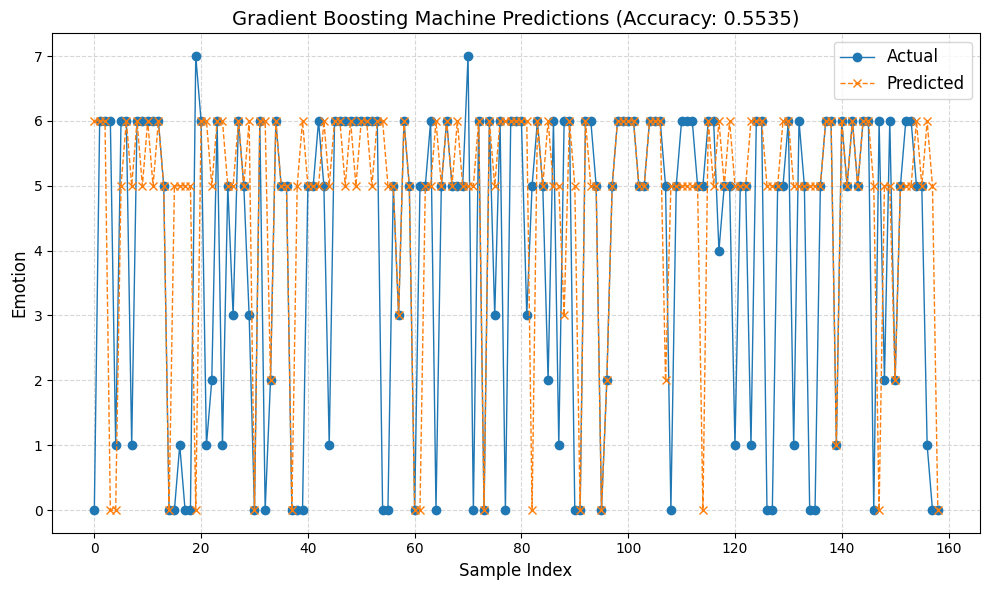

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained the models (lr_classifier, rf_classifier, gb_classifier)
# and have the test data (X_test, y_test) as in the provided code.

# Function to create a line plot for a given model
def plot_line(model, model_name):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
    plt.plot(range(len(y_test)), y_test, label='Actual', marker='o', linestyle='-', linewidth=1)
    plt.plot(range(len(predictions)), predictions, label='Predicted', marker='x', linestyle='--', linewidth=1)


    plt.title(f'{model_name} Predictions (Accuracy: {accuracy:.4f})', fontsize=14) # Increased fontsize
    plt.xlabel('Sample Index', fontsize=12)
    plt.ylabel('Emotion', fontsize=12)
    plt.legend(fontsize=12)  # Increased legend fontsize
    plt.grid(True, linestyle='--', alpha=0.5) # Add a grid for better readability
    plt.xticks(fontsize=10) # Adjust x-axis tick fontsize
    plt.yticks(fontsize=10) # Adjust y-axis tick fontsize
    plt.tight_layout()      # Adjust layout to prevent labels from overlapping
    plt.show()

# Create line plots for each model
plot_line(lr_classifier, 'Logistic Regression')
plot_line(rf_classifier, 'Random Forest')
plot_line(gb_classifier, 'Gradient Boosting Machine')


In [ ]:
import plotly.figure_factory as ff
import datetime

# Define the tasks and their start and end dates
tasks = [
    dict(Task="Data Collection & Cleaning", Start='2025-01-23', Finish='2025-02-06', Resource="Project Team"),
    dict(Task="Feature Extraction & Selection", Start='2025-02-07', Finish='2025-02-20', Resource="Data Scientists"),
    dict(Task="Model Development & Training", Start='2025-02-21', Finish='2025-03-13', Resource="ML Engineers"),
    dict(Task="Model Evaluation & Refinement", Start='2025-03-14', Finish='2025-03-27', Resource="Data Scientists"),
    dict(Task="Visualization & Report Writing", Start='2025-03-28', Finish='2025-04-03', Resource="Data Analysts"),
    dict(Task="PPT Preparation & Revisions", Start='2025-04-03', Finish='2025-04-10', Resource="Project Team")
]

# Define colors for each resource
colors = {'Project Team': 'rgb(0, 128, 255)', # Blue
          'Data Scientists': 'rgb(246, 78, 139)', # Pink
          'ML Engineers': 'rgb(58, 200, 225)', # Light Blue
          'Data Analysts': 'rgb(50, 80, 255)'} # Dark blue

# Create the Gantt chart
fig = ff.create_gantt(tasks, colors=colors, index_col='Resource', show_colorbar=True,
                     bar_width=0.4, showgrid_x=True, showgrid_y=True, title='Project Timeline Gantt Chart')

# Update layout for better readability
fig.update_layout(
    xaxis_title="Timeline",
    yaxis_title="Tasks",
    font=dict(family="Arial, sans-serif", size=12, color="White"),
    plot_bgcolor='rgba(0,0,0,0)', # Transparent plot background
    paper_bgcolor='rgba(1,1,1,1)', # Transparent paper background
    xaxis=dict(gridcolor='lightgrey'),
    yaxis=dict(gridcolor='lightgrey')
)
# Display the chart
fig.show()